In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load fold1 data
images_fold1 = np.load('../../PanNuke_Dataset/fold_1/Fold 1/images/fold1/images.npy')
masks_fold1 = np.load('../../PanNuke_Dataset/fold_1/Fold 1/masks/fold1/masks.npy')
types_fold1 = np.load('../../PanNuke_Dataset/fold_1/Fold 1/images/fold1/types.npy')

In [3]:
print(f"Fold1 Images shape: {images_fold1.shape}\nFold1 Masks shape: {masks_fold1.shape}\nFold1 Type shape: {types_fold1.shape}")

'''
(num_images, 256, 256, 3) - shape of images
(num_images, 256, 256, 6) - shape of masks
(num_images,) - shape of types
'''

Fold1 Images shape: (2656, 256, 256, 3)
Fold1 Masks shape: (2656, 256, 256, 6)
Fold1 Type shape: (2656,)


'\n(num_images, 256, 256, 3) - shape of images\n(num_images, 256, 256, 6) - shape of masks\n(num_images,) - shape of types\n'

In [4]:
img1 = images_fold1[0]
mask1 = masks_fold1[0]
type1 = types_fold1[0]

print(f"Image shape: {img1.shape}\nMask shape: {mask1.shape}")

Image shape: (256, 256, 3)
Mask shape: (256, 256, 6)


In [5]:
# datatypes
print(f"Image dtype: {img1.dtype}\nMask dtype: {mask1.dtype}\nType dtype: {type1.dtype}")

Image dtype: float64
Mask dtype: float64
Type dtype: <U6


In [6]:
print(np.min(img1[0]))
print(np.max(img1[0]))

52.0
252.0


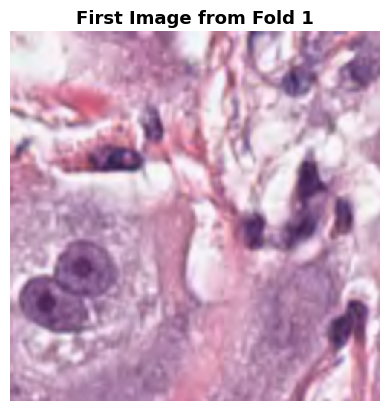

In [9]:
org_image = img1.astype(np.uint8)
normalized_image = img1 / 255.0
plt.imshow(org_image)
plt.title('First Image from Fold 1', fontsize=13, fontweight='bold')
plt.axis('off')
plt.show()

# Save the first image
plt.imsave('results/first_image_fold1.png', org_image)

In [10]:
# Mask has 6 channels
no_channels = mask1.shape[-1]
for i in range(no_channels):
    unique_values = np.unique(mask1[:, :, i])
    print(f"Channel {i}: {len(unique_values)} unique values. Examples: {unique_values[:5]}") 

Channel 0: 5 unique values. Examples: [ 0.  3. 31. 38. 40.]
Channel 1: 3 unique values. Examples: [ 0. 19. 28.]
Channel 2: 3 unique values. Examples: [ 0. 18. 41.]
Channel 3: 1 unique values. Examples: [0.]
Channel 4: 1 unique values. Examples: [0.]
Channel 5: 2 unique values. Examples: [0. 1.]


In [11]:
class_names = [
    "Neoplastic",       # Channel 0
    "Inflammatory",     # Channel 1
    "Connective",       # Channel 2
    "Dead Cells",       # Channel 3
    "Epithelial",       # Channel 4
    "Background"        # Channel 5
]

In [12]:
print("Unique values in each mask channel:")
for i in range(no_channels):
    channel_data = mask1[:, :, i]
    unique_values = np.unique(channel_data)
    print(f"Channel {i} ({class_names[i]}): {len(unique_values)} unique values. Examples: {unique_values[:5]}")

Unique values in each mask channel:
Channel 0 (Neoplastic): 5 unique values. Examples: [ 0.  3. 31. 38. 40.]
Channel 1 (Inflammatory): 3 unique values. Examples: [ 0. 19. 28.]
Channel 2 (Connective): 3 unique values. Examples: [ 0. 18. 41.]
Channel 3 (Dead Cells): 1 unique values. Examples: [0.]
Channel 4 (Epithelial): 1 unique values. Examples: [0.]
Channel 5 (Background): 2 unique values. Examples: [0. 1.]


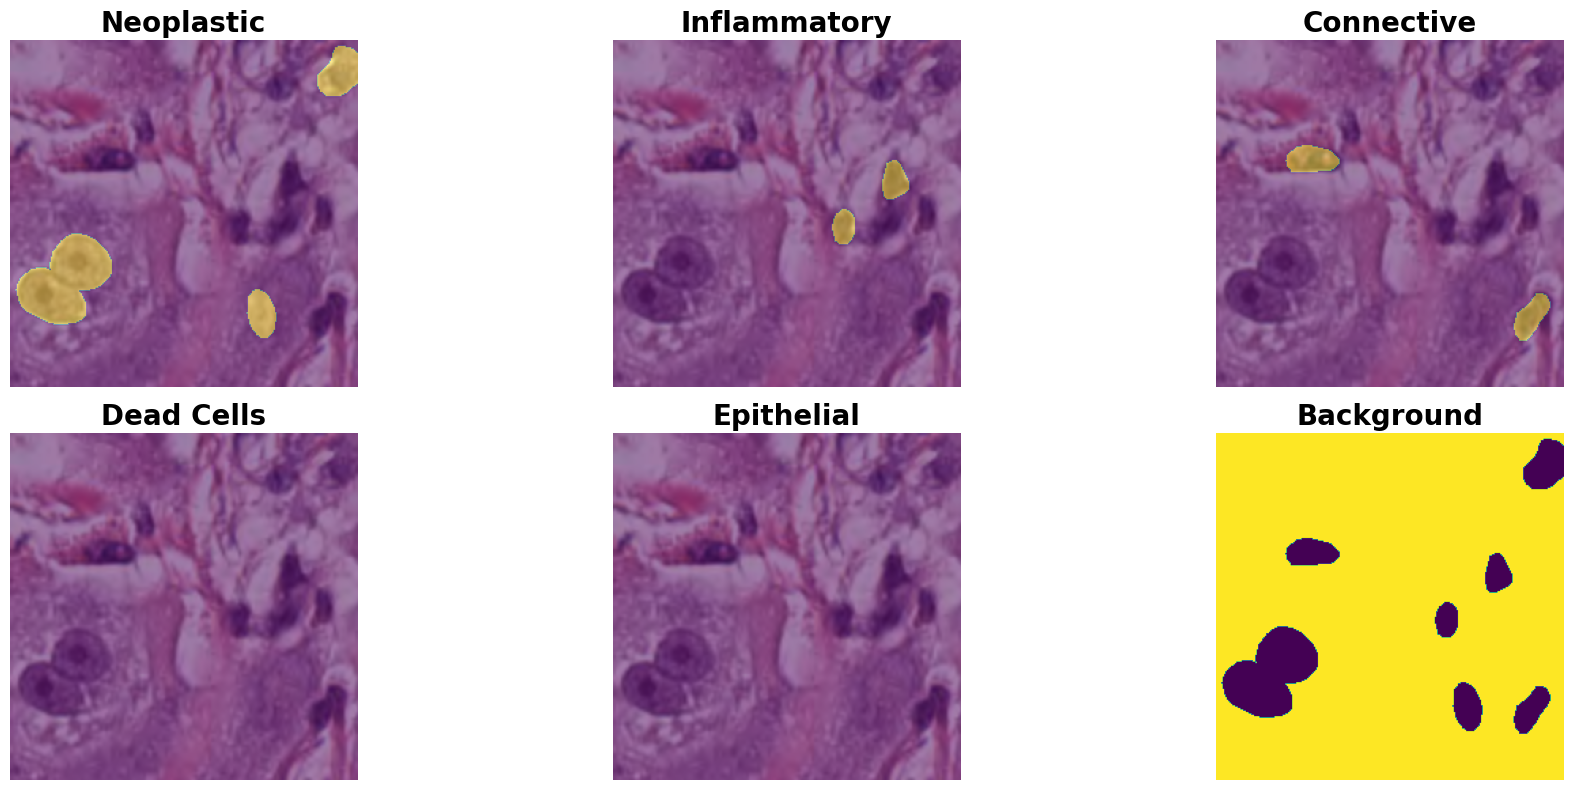

In [29]:
plt.figure(figsize=(20, 8))
for i in range(no_channels):
    plt.subplot(2, 3, i + 1)
    channel_mask_data = mask1[:, :, i]

    if i < 5:
        display_mask = (channel_mask_data > 0).astype(np.uint8)
        plt.imshow(org_image)
        plt.imshow(display_mask, alpha=0.5, cmap='viridis')
        plt.title(f"{class_names[i]}", fontsize=20, fontweight='bold')
    else:
        plt.imshow(channel_mask_data)
        plt.title(f"{class_names[i]}", fontsize=20, fontweight='bold')
    plt.axis('off')
plt.tight_layout()
plt.show()    

In [20]:
composite_instance_mask_rgb = np.zeros_like(org_image, dtype=np.uint8)

type_colors = [
    [255, 0, 0],    # Red for Neoplastic
    [0, 255, 0],    # Green for Inflammatory
    [0, 0, 255],    # Blue for Connective
    [255, 255, 0],  # Yellow for Dead Cells
    [255, 165, 0]   # Orange for Epithelial
]

for i in range(5): 
    instance_channel = mask1[:, :, i]
    unique_ids = np.unique(instance_channel)
    for instance_id in unique_ids:
        if instance_id == 0:
            continue
        composite_instance_mask_rgb[instance_channel == instance_id] = type_colors[i]


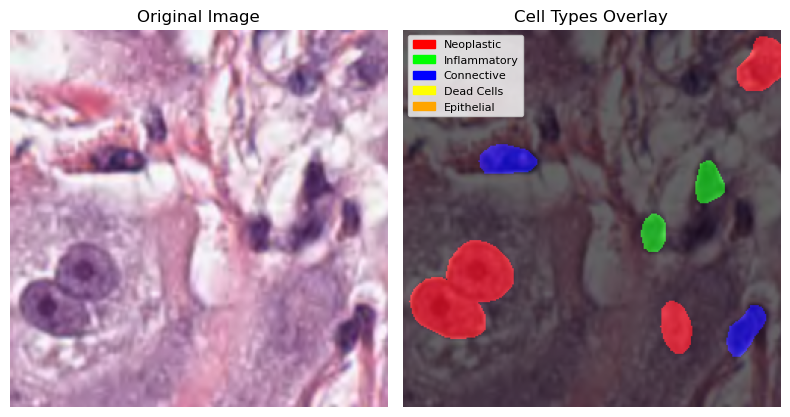

In [21]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.imshow(org_image) 
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(org_image) 
plt.imshow(composite_instance_mask_rgb, alpha=0.6)
plt.title("Cell Types Overlay")
plt.axis('off')

patches = [plt.Rectangle((0,0),1,1, color=np.array(c)/255.) for c in type_colors]
plt.legend(patches, class_names[:5], loc='upper left', prop={'size': 8})
plt.tight_layout()
plt.show()

In [81]:
nuclei_counts_first_image = {}
total_nuclei_img1= 0

print("\nNuclei counts for the first image (from masks_fold1[0]):")
for i in range(5):
    instance_channel = mask1[:, :, i]
    count = len(np.unique(instance_channel[instance_channel > 0]))
    nuclei_counts_first_image[class_names[i]] = count
    total_nuclei_img1 += count
    print(f"  {class_names[i]}: {count} nuclei")

print(f"  Total nuclei in this image: {total_nuclei_img1}")



Nuclei counts for the first image (from masks_fold1[0]):
  Neoplastic: 4 nuclei
  Inflammatory: 2 nuclei
  Connective: 2 nuclei
  Dead Cells: 0 nuclei
  Epithelial: 0 nuclei
  Total nuclei in this image: 8
